#Decission Tree:-

#Theory:-

1. What is a Decision Tree, and how does it work
 - A Decision Tree is a supervised machine learning model used for classification and regression.
 - It splits the data into subsets based on feature values using a tree-like model of decisions.

2. What are impurity measures in Decision Trees
 - Impurity measures determine how well a split separates the classes.
 - Common measures: Gini Impurity and Entropy.

3. What is the mathematical formula for Gini Impurity
 - Gini = 1 - sum(p_i^2) where p_i is the probability of class i.

4. What is the mathematical formula for Entropy
 - Entropy = - sum(p_i * log2(p_i))

5. What is Information Gain, and how is it used in Decision Trees
 - Information Gain = Entropy(parent) - weighted avg entropy(children)
 - It measures the reduction in entropy after a split.

6. What is the difference between Gini Impurity and Entropy
 - Gini is computationally faster. Entropy has stronger theoretical foundation from information theory.

7. What is the mathematical explanation behind Decision Trees
 - At each node, select the feature and threshold that gives the best impurity reduction.

8. What is Pre-Pruning in Decision Trees
 - Pre-pruning stops the tree growth early based on a threshold (e.g., max depth, min samples).

9. What is Post-Pruning in Decision Trees
 - Post-pruning grows the full tree then prunes back branches using validation set or CCP.

10. What is the difference between Pre-Pruning and Post-Pruning
 - Pre-pruning halts during training; Post-pruning removes branches after training.

11. What is a Decision Tree Regressor
 - A tree used to predict continuous values using splits minimizing MSE.

12. What are the advantages and disadvantages of Decision Trees
 - Advantages: Interpretable, handles mixed data, no need for scaling.
 - Disadvantages: Prone to overfitting, sensitive to data variations.

13. How does a Decision Tree handle missing values
 - Strategies include surrogate splits, imputation, or ignoring.

14. How does a Decision Tree handle categorical features
 - Decision trees can split on categorical values directly or after encoding.

15. What are some real-world applications of Decision Trees?
 - Credit scoring, medical diagnosis, fraud detection, marketing segmentation.

#Practicals:-

In [1]:
# 16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
# 17. Train Decision Tree Classifier using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances (Gini):", clf_gini.feature_importances_)

Feature Importances (Gini): [0.01667014 0.01667014 0.38926487 0.57739485]


In [3]:
# 18. Train Decision Tree Classifier using Entropy and print model accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 1.0


In [4]:
# 19. Train a Decision Tree Regressor on housing dataset and evaluate MSE
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
cal = fetch_california_housing()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cal.data, cal.target, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(Xc_train, yc_train)
yc_pred = reg.predict(Xc_test)
print("MSE:", mean_squared_error(yc_test, yc_pred))

MSE: 0.4900921617627907


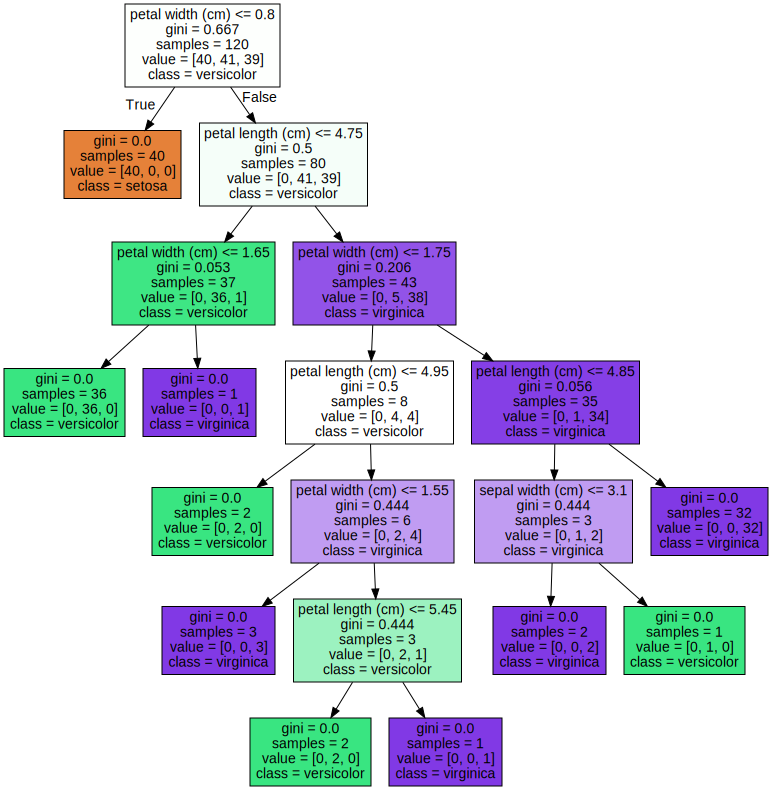

In [5]:
# 20. Train Decision Tree Classifier and visualize the tree using graphviz
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file="tree.dot", feature_names=load_iris().feature_names,
                class_names=load_iris().target_names, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
# 21. Train Decision Tree Classifier with max_depth=3 and compare accuracy with full tree
clf_small = DecisionTreeClassifier(max_depth=3)
clf_small.fit(X_train, y_train)
print("Accuracy (Max Depth=3):", accuracy_score(y_test, clf_small.predict(X_test)))
print("Accuracy (Full Tree):", accuracy_score(y_test, clf.predict(X_test)))


Accuracy (Max Depth=3): 1.0
Accuracy (Full Tree): 1.0


In [7]:
# 22. Train with min_samples_split=5 and compare with default tree
clf_split = DecisionTreeClassifier(min_samples_split=5)
clf_split.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split.predict(X_test)))

Accuracy (min_samples_split=5): 1.0


In [8]:
# 23. Apply feature scaling before training a Decision Tree Classifier and compare accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
print("Accuracy with Scaling:", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))

Accuracy with Scaling: 1.0


In [9]:
# 24. Train using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("OvR Accuracy:", ovr_clf.score(X_test, y_test))


OvR Accuracy: 1.0


In [10]:
# 25. Display feature importance scores
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.         0.01667014 0.40593501 0.57739485]


In [11]:
# 26. Train Decision Tree Regressor with max_depth=5 and compare with unrestricted tree
reg5 = DecisionTreeRegressor(max_depth=5)
reg5.fit(Xc_train, yc_train)
print("MSE (max_depth=5):", mean_squared_error(yc_test, reg5.predict(Xc_test)))

MSE (max_depth=5): 0.5245146178314736


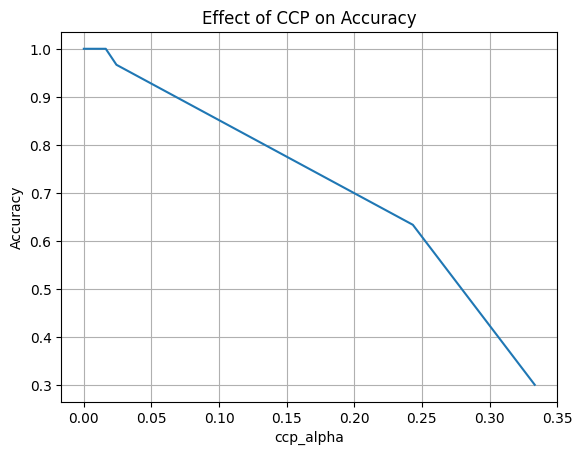

In [12]:
# 27. Apply Cost Complexity Pruning (CCP) and visualize effect on accuracy
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
acc = []
for ccp in ccp_alphas:
    clf_ccp = DecisionTreeClassifier(ccp_alpha=ccp)
    clf_ccp.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, clf_ccp.predict(X_test)))
import matplotlib.pyplot as plt
plt.plot(ccp_alphas, acc)
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of CCP on Accuracy")
plt.grid(True)
plt.show()

In [13]:
# 28. Evaluate performance using Precision, Recall, and F1-Score
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



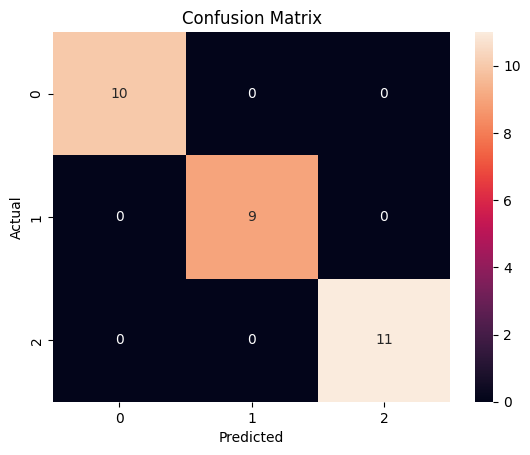

In [14]:
# 29. Visualize confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
# 30. Use GridSearchCV to find optimal max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 5, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 1.0
